# 可视化探索语义分割数据集



## 进入`mmsegmentation`主目录

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'd:\\chaosheng\\output\\MMSegmentation_Tutorials-20230816\\mmsegmentation'

## 导入工具包

In [5]:
import os
import numpy as np

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 查看单张图像及其语义分割标注

In [4]:
# 指定单张图像路径
img_path = 'LSR16F656/img_dir/train/001 (1009).tiff'
mask_path = 'LSR16F656/ann_dir/train/001 (1009).png'


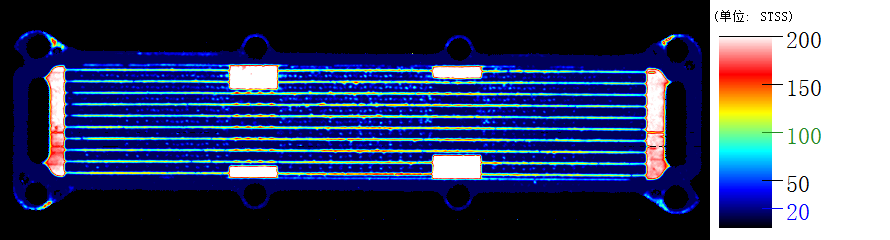

In [5]:
Image.open(img_path)

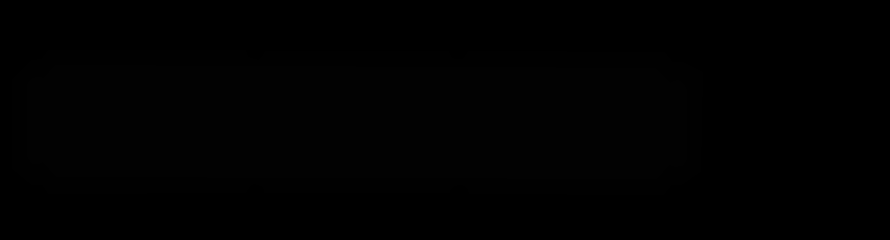

In [6]:
Image.open(mask_path)

In [7]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [8]:
img.shape

(240, 890, 3)

In [9]:
mask.shape

(240, 890, 3)

## mask灰度图标注含义

In [10]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2], dtype=uint8)

| 类别名称   | 类别语义 | 标注类别          | 灰度图像素值 |
| ---------- | -------- | ----------------- | ------------ |
| /          | 背景     | /                 | 0            |
| outer_ring | 大圈 | 多段线（polygon） | 1            |
| inner_ring | 小圈 | 多段线（polygon） | 2            |


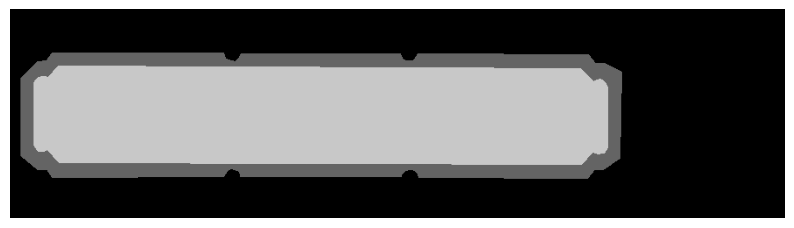

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(mask*100)
plt.axis('off')
plt.show()

## 将语义分割标注叠加在原图上显示

In [12]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['outer_ring', [0,0,200]],
    ['inner_ring', [0,200,0]]
    
]

In [13]:
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [15]:
palette_dict

{0: [127, 127, 127], 1: [0, 0, 200], 2: [0, 200, 0]}

In [16]:
mask = mask[:,:,0]

# 将整数ID，映射为对应类别的颜色
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# 将语义分割标注图和原图叠加显示
opacity = 0.2 # 透明度越大，可视化效果越接近原图
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

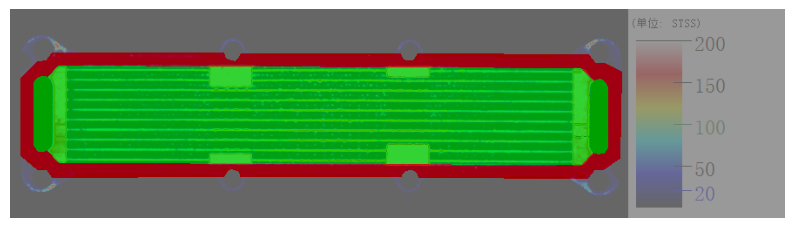

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')
plt.show()

In [18]:
cv2.imwrite('outputs/001 (1009).jpg', label_viz)

True

## 批量可视化图像和标注

In [19]:
# 指定图像和标注路径

# 训练集
PATH_IMAGE = 'LSR16F656/img_dir/train'
PATH_MASKS = 'LSR16F656/ann_dir/train'

# 测试集
# PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/val'
# PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/val'

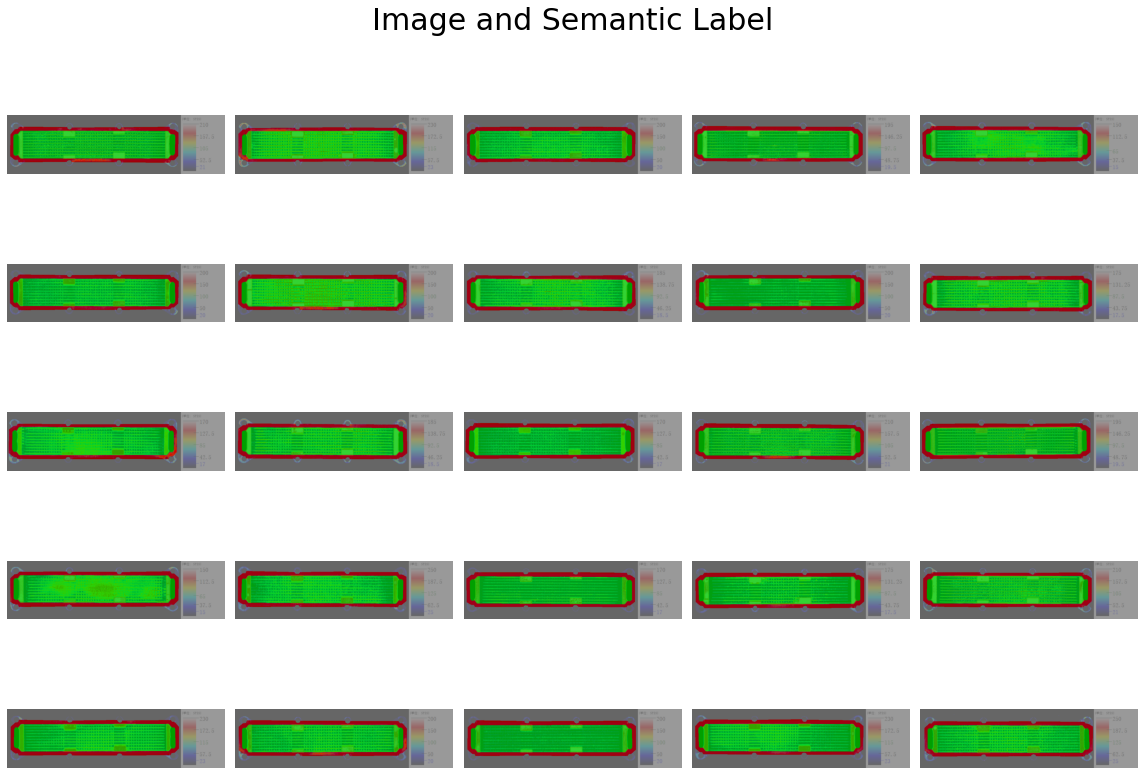

In [20]:
# n 行 n 列可视化
n = 5

# 透明度越大，可视化效果越接近原图
opacity = 0.2 

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # 将预测的整数ID，映射为对应类别的颜色
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # 将语义分割标注图和原图叠加显示
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # 可视化
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.savefig('outputs/D-2.jpg')
plt.show()

In [27]:
PATH_IMAGE = 'LSR16F656/img_dir/train'
PATH_IMAGE_val = 'LSR16F656/img_dir/val'
PATH_MASKS = 'LSR16F656/ann_dir/train'
PATH_MASKS_val = 'LSR16F656/ann_dir/val'

len(os.listdir(PATH_IMAGE))
# len(os.listdir(PATH_IMAGE_val))
len(os.listdir(PATH_MASKS))
# len(os.listdir(PATH_MASKS_val))


525

In [1]:
import os
os.chdir('mmsegmentation')
os.getcwd()

'd:\\chaosheng\\output\\MMSegmentation_Tutorials-20230816\\mmsegmentation'

In [2]:
import os
import numpy as np

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
template_path = 'LSR16F656/match/2.jpg'
img_path = 'LSR16F656/match/001554.tiff'
img_seg_path = 'LSR16F656/match/16f108.tiff'
img = cv2.imread(img_path) 
img_seg = cv2.imread(img_seg_path)
# img_seg = cv2.resize(img_seg, (890, 240))
template =cv2.imread(template_path, 0)
template = cv2.cvtColor(template, cv2.COLOR_GRAY2BGR)
# template = cv2.resize(template, (890, 240))

def find_nonzero_positions(arr):
    first_nonzero = None
    last_nonzero = None

    for i, value in enumerate(arr):
        if value != 0:
            if first_nonzero is None:
                first_nonzero = i
            last_nonzero = i

    return first_nonzero, last_nonzero

image1 = img_seg[:, :, 0]

image_row = np.sum(image1, axis=0)

image_col = np.sum(image1, axis=1)


# 找出第一个和最后一个非零元素的位置
first_row, last_row = find_nonzero_positions(image_row)
first_col, last_col = find_nonzero_positions(image_col)
width = last_row-first_row

image2 = template[:, :, 0]

image_row2 = np.sum(image2, axis=0)

image_col2 = np.sum(image2, axis=1)


# 找出第一个和最后一个非零元素的位置
first_row2, last_row2 = find_nonzero_positions(image_row2)
first_col2, last_col2 = find_nonzero_positions(image_col2)
width2 = last_row2-first_row2

# 打印结果
print("分割长：第一个非零元素的位置:", first_row)
print("分割长：最后一个非零元素的位置:", last_row)
print("分割长：", width)

print("模板长：第一个非零元素的位置:", first_row2)
print("模板长：最后一个非零元素的位置:", last_row2)
print("模板长：", width2)

gamma = width/width2

print(img_seg.shape)
print(template.shape)
print(gamma)

template = cv2.resize(template, (int(template.shape[1]*gamma), int(template.shape[0]*gamma)))
print(img_seg.shape)
print(template.shape)

# height, width = template.shape[:2]
# new_size = (width // 6, height // 6)
# template = cv2.resize(template, new_size, interpolation=cv2.INTER_LINEAR)

def cv_show(name,img):
    cv2.imshow(name,img)  # 传入自定义图像名，和图像变量
    cv2.waitKey(0)   # 图片不会自动消失
    # cv2.destroyWindow()   # 手动关闭窗口
# 显示图像
cv_show('img',img_seg)
cv_show('face',template)

分割长：第一个非零元素的位置: 7
分割长：最后一个非零元素的位置: 696
分割长： 689
模板长：第一个非零元素的位置: 8
模板长：最后一个非零元素的位置: 2588
模板长： 2580
(240, 890, 3)
(531, 2589, 3)
0.26705426356589146
(240, 890, 3)
(141, 691, 3)


In [37]:

methods_min = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# methods = ['cv2.TM_CCOEFF',]
for method in methods:
    method_index = eval(method)
    #（1）匹配单个对象
    # img代表原始图像，template代表模板窗口，1默认为cv2.TM_SQDIFF方法
    res = cv2.matchTemplate(img_seg, template, method_index) 
    # 获取结果的最值和最值位置
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    top_left = min_loc if method in methods_min else max_loc
    # 最值位置是左上角的坐标位置，通过模板的宽和高可以在原图上把模板位置画出来
    h,w,_ = template.shape  # shape值是(高,宽)
    # 找出右下位置
    # top_left=(top_left[0]+15,top_left[1]+10)
    bottom_right = (top_left[0]+w,top_left[1]+h)
    # 复制一份图像，不然画框的时候原图像会变
    draw = img_seg.copy()
    # 输入图像画板draw，左上坐标，右下坐标
    cv2.rectangle(draw,top_left,bottom_right,(0,0,255),2)
    print(draw.shape)
    print(template.shape)
    crop = draw[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0], :] 
    dst=cv2.addWeighted(crop,0.75,template,0.25,0)
    draw[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0], :] = dst
    cv_show(f'{method}', draw)
    cv2.imwrite(f'D:\chaosheng\output\MMSegmentation_Tutorials-20230816\mmsegmentation\LSR16F656\match\{method}_match.png',draw)
    

(240, 890, 3)
(141, 691, 3)
(240, 890, 3)
(141, 691, 3)
(240, 890, 3)
(141, 691, 3)
(240, 890, 3)
(141, 691, 3)
(240, 890, 3)
(141, 691, 3)
(240, 890, 3)
(141, 691, 3)
